In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [3]:

df_exploded = df_DA.explode('job_skills')

In [4]:
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)

In [5]:
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending=False).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

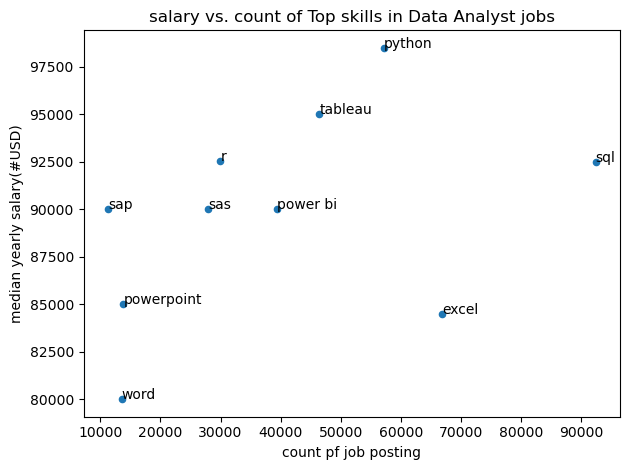

In [6]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('count pf job posting')
plt.ylabel('median yearly salary(#USD)')
plt.title('salary vs. count of Top skills in Data Analyst jobs')
plt.tight_layout()
for i, txt in enumerate (skill_stats.index):
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show